In [1]:
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

sinthetic_samples_by_class=16

In [2]:
def rank_classes(confusion_matrix, method='CCR', verbose=True):
    '''TODO: ccr
    TODO: uniform'''
    if method == 'CCR':
        ccrs = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=1)
        class_ranking = np.argsort(ccrs)
        return class_ranking, ccrs[class_ranking]
    
    elif method == 'max_confusion':
        off_diagonal_sum = np.sum(confusion_matrix, axis=1) - np.diag(confusion_matrix)
        class_ranking = np.argsort(off_diagonal_sum)[::-1]  
        return class_ranking, off_diagonal_sum[class_ranking]

    elif method == 'max_pairwise_confusion':
        m = confusion_matrix
        class_ranking = []
        print(m)
        while len(class_ranking)<m.shape[0]:
            if verbose:
                print(find_argmax_off_diagonal(m))
            (a,b) = find_argmax_off_diagonal(m)
            print(m[a,b])
            m[a,b] = 0
            m[b,a] = 0
            if a not in class_ranking:
                class_ranking.append(a)
            if b not in class_ranking:
                class_ranking.append(b)
            if verbose:
                print(a,b)
                print(m)
                print(class_ranking)
        return np.asarray(class_ranking), m        
    else:
        raise ValueError("Unknown method: {}".format(method))
        
def find_argmax_off_diagonal(matrix):
    matrix_copy = np.array(matrix)
    np.fill_diagonal(matrix_copy, 0)
    # Finding the indices of the maximum off-diagonal value
    argmax_indices = np.unravel_index(np.argmax(matrix_copy, axis=None), matrix_copy.shape)
    return argmax_indices


cm: 
[[30 20 10  5]
 [24 40  5 27]
 [25 10 50 15]
 [12 10 50 15]]


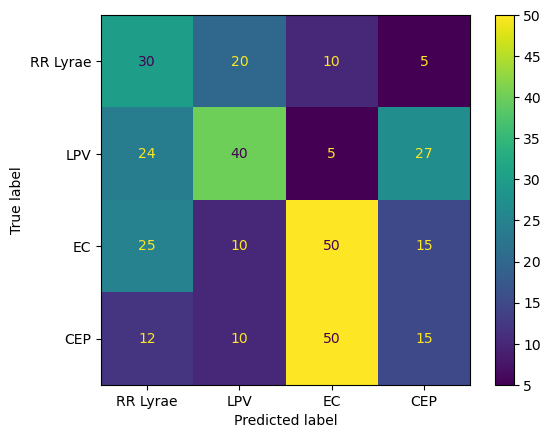

In [31]:
'''X = np.random.rand(*(500, 6))
y_unique_values = [0, 1, 2, 3, 4]
y = np.random.choice(y_unique_values, size=(500,1))


# Create and fit the logistic regression model
clf = LogisticRegression(random_state=0, max_iter=100)
clf.fit(X, y)


pred = clf.predict(X)
cm = confusion_matrix(y, pred)'''
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt 

cm = np.asarray([[30, 20, 10, 5],
 [24, 40, 5, 27],   
 [25, 10, 50, 15], 
[12, 10, 50, 15]] )

print('cm: ')
print(np.round(cm,2))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['RR Lyrae', 'LPV', 'EC', 'CEP'])
disp.plot()
plt.savefig('cm.png')


In [32]:
ranking, ccrs = rank_classes(cm, method='CCR')

print('Ranking: ', ranking)
print(type(ranking))


ranking, ccrs = rank_classes(cm, method='max_confusion')

print('Ranking: ', ranking)
print(type(ranking))

Ranking:  [3 1 0 2]
<class 'numpy.ndarray'>
Ranking:  [3 1 2 0]
<class 'numpy.ndarray'>


In [33]:
ranking, ccrs = rank_classes(cm, method='max_pairwise_confusion')
print('Ranking: ', ranking)
print(type(ranking))

[[30 20 10  5]
 [24 40  5 27]
 [25 10 50 15]
 [12 10 50 15]]
(3, 2)
50
3 2
[[30 20 10  5]
 [24 40  5 27]
 [25 10 50  0]
 [12 10  0 15]]
[3, 2]
(1, 3)
27
1 3
[[30 20 10  5]
 [24 40  5  0]
 [25 10 50  0]
 [12  0  0 15]]
[3, 2, 1]
(2, 0)
25
2 0
[[30 20  0  5]
 [24 40  5  0]
 [ 0 10 50  0]
 [12  0  0 15]]
[3, 2, 1, 0]
Ranking:  [3 2 1 0]
<class 'numpy.ndarray'>


In [34]:
#ADD TO RANK_CLASS

dict_priorization = {}
ranking_penalization = 2
for o in ranking:
    dict_priorization[o] =  int(sinthetic_samples_by_class*ranking_penalization)
    if ranking_penalization>0.5:
        ranking_penalization = ranking_penalization/2
print(dict_priorization)

{3: 32, 2: 16, 1: 8, 0: 8}
